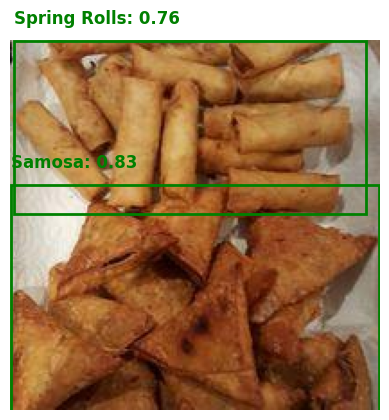

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="Wbu8WfSH3i8hHbdc88lO"
)

result = CLIENT.infer("test\images/31_8_jpg.rf.a447fb1d81222cf14f1e3906e75d5baa.jpg", model_id="nutracal-food-detection/1")

# Load the image 
img = Image.open("test\images/31_8_jpg.rf.a447fb1d81222cf14f1e3906e75d5baa.jpg")

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(img)

# Loop through each prediction and draw its bounding box and annotation
for pred in result["predictions"]:
    # Extract values from the result
    x_center = pred["x"]
    y_center = pred["y"]
    width = pred["width"]
    height = pred["height"]
    confidence = pred["confidence"]
    class_name = pred["class"]
    
    # Calculate the top-left corner from center coordinates
    x1 = x_center - width / 2
    y1 = y_center - height / 2

    # Create and add the rectangle patch for the bounding box
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    
    # Create the annotation text (with confidence rounded to 2 decimals)
    annotation = f"{class_name}: {confidence:.2f}"
    ax.text(x1, y1 - 10, annotation, color='g', fontsize=12, weight='bold')

# Remove axis ticks and display the image
plt.axis('off')
plt.show()